# Промежуточная аттестация по сетям искусcтвенных нейронов.
## Задание

**Ваша задача - создать классификатор изображений с помощью Keras и сверточных нейронных сетей для набора данных Fashion MNIST. Этот набор данных включает 10 меток с разными типами одежды с изображениями 28 на 28 * в оттенках серого *. Имеется обучающий набор из 60 000 изображений и 10 000 тестовых изображений.**

## Решение

## 1. Подключение библиотек

In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np
import random
import tensorflow as tf

## 2. Загрузка данных

In [2]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

In [3]:
# Создание списка названий для классов датасета
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

print("Описание классов:")
print()
print("Label       Description")
print()
for class_numb in range(len(class_names)):
    print(class_numb, "      ", class_names[class_numb])

Описание классов:

Label       Description

0        T-shirt/top
1        Trouser
2        Pullover
3        Dress
4        Coat
5        Sandal
6        Shirt
7        Sneaker
8        Bag
9        Ankle boot


## Визаулизация датасета

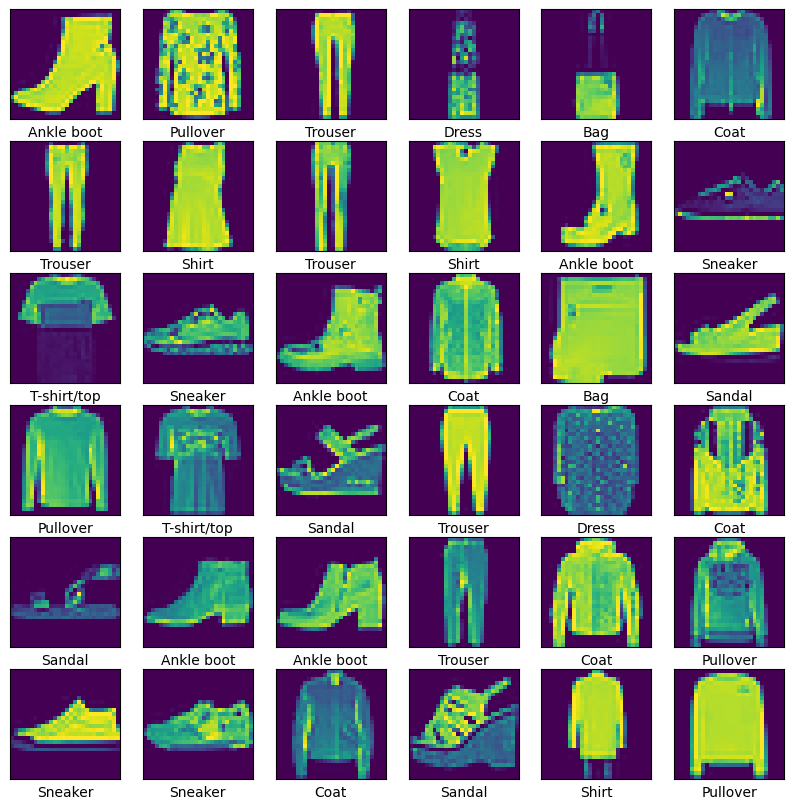

In [4]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(X_train[image_ind]))
    plt.xlabel(class_names[Y_train[image_ind]])

## 3. Предобработка

**Нормализация X_train, X_test от 0 до 1**

In [5]:
X_train = (X_train/255.).astype(np.float32)
X_test = (X_test/255.).astype(np.float32)

**Измение формы массивов X_train и X_test так, чтобы они стали 4-мерными**
(batch_size, channels,H, W)

In [6]:
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

print("X_train shape: ", X_train.shape)
print("X_test shape:  ", X_test.shape)

X_train shape:  (60000, 28, 28, 1)
X_test shape:   (10000, 28, 28, 1)


**Преобразование в one_hot для y_train и y_test**

In [7]:
Y_train = tf.keras.utils.to_categorical(
    Y_train, num_classes=len(class_names), dtype='float32'
)

Y_test = tf.keras.utils.to_categorical(
    Y_test, num_classes=len(class_names), dtype='float32'
)

print("Y_train:\n", Y_train)
print()
print("Y_test:\n", Y_test)

Y_train:
 [[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Y_test:
 [[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## 4. Создание модели

Структура:
* Сверточный слой, 32 фильтра, размер ядра=(4,4)
* Пулинг с pool_size = (2,2)

* Выпрямляющий слой (Flatten)

* Полносвязный слой (например 128 нейронов), RELU 
* Выходной полносвязный слой с 10 нейронами с softmax 

In [8]:
def build_cnn_model():
    cnn_model = tf.keras.Sequential([
                                    tf.keras.layers.Conv2D(filters=32, kernel_size=(4,4), activation=tf.nn.relu),
                                    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])

    return cnn_model

model = build_cnn_model()

# Единичный вызов модели для её инициализации
model.predict(X_train[[0]])

# Вывод характеристик модели
print(model.summary())

1/1 [==============================] - 0s 180ms/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591786 (2.26 MB)
Trainable params: 591786 (2.26 MB)
Non

In [9]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## 5. Обучение модели

In [10]:
model.fit(X_train, Y_train, batch_size=64, epochs=10)

Epoch 1/10
938/938 [==============================] - 14s 14ms/step - loss: 0.4426 - accuracy: 0.8435
Epoch 2/10
938/938 [==============================] - 13s 14ms/step - loss: 0.2950 - accuracy: 0.8933
Epoch 3/10
938/938 [==============================] - 12s 13ms/step - loss: 0.2515 - accuracy: 0.9071
Epoch 4/10
938/938 [==============================] - 12s 13ms/step - loss: 0.2207 - accuracy: 0.9189
Epoch 5/10
938/938 [==============================] - 12s 13ms/step - loss: 0.1977 - accuracy: 0.9276
Epoch 6/10
938/938 [==============================] - 12s 13ms/step - loss: 0.1758 - accuracy: 0.9360
Epoch 7/10
938/938 [==============================] - 12s 13ms/step - loss: 0.1597 - accuracy: 0.9412
Epoch 8/10
938/938 [==============================] - 12s 13ms/step - loss: 0.1430 - accuracy: 0.9479
Epoch 9/10
938/938 [==============================] - 12s 13ms/step - loss: 0.1289 - accuracy: 0.9529
Epoch 10/10
938/938 [==============================] - 12s 13ms/step - loss: 0.115

## 6. Оценка модели на тестовой выборке

**Accuracy**

In [11]:
test_loss, test_acc = model.evaluate(X_test, Y_test)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.2828 - accuracy: 0.9095
Test accuracy: 0.909500002861023


**Преобразую predictions к тому же виду, что и Y_test**

In [12]:
# Вывожу сырой predictions
predictions = model.predict(X_test)
predictions

313/313 [==============================] - 1s 3ms/step


array([[3.12041273e-08, 5.36561663e-11, 2.95168885e-08, ...,
        2.12687282e-05, 3.55435930e-07, 9.99934554e-01],
       [2.62404433e-06, 4.77005969e-15, 9.99996185e-01, ...,
        3.47733385e-14, 2.14844288e-12, 2.11918373e-13],
       [4.66301664e-09, 1.00000000e+00, 2.07799459e-15, ...,
        2.74681932e-17, 8.77890612e-15, 3.55846419e-15],
       ...,
       [5.59975677e-11, 2.12131907e-13, 3.08418534e-11, ...,
        1.14487836e-10, 1.00000000e+00, 2.40744463e-13],
       [2.60227312e-10, 1.00000000e+00, 2.85644040e-14, ...,
        2.44535712e-16, 5.74740654e-15, 1.18363106e-11],
       [1.43854586e-05, 6.17374667e-08, 1.40800897e-04, ...,
        3.74714076e-03, 2.45280709e-04, 2.13547586e-03]], dtype=float32)

In [13]:
# Получаю массив точных значений predictions
predictions = np.argmax(predictions, axis=1)

# One-hot-encoding для массива значений predictions
predictions = tf.keras.utils.to_categorical(
    predictions, num_classes=None, dtype='float32'
)

# Вывожу изменённый predictions
predictions

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

**Precision, recall, f1-score**

In [14]:
print(classification_report(Y_test, predictions, target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.87      0.83      0.85      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.92      0.78      0.84      1000
       Dress       0.92      0.92      0.92      1000
        Coat       0.82      0.89      0.85      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.71      0.80      0.75      1000
     Sneaker       0.97      0.95      0.96      1000
         Bag       0.98      0.99      0.98      1000
  Ankle boot       0.95      0.98      0.96      1000

   micro avg       0.91      0.91      0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000
 samples avg       0.91      0.91      0.91     10000

